In [1]:
import os
import numpy as np
import nibabel as nib

# Define your base path to the dataset directory
base_path = r"C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData"

# Function to load a NIfTI file and normalize its data
def load_and_normalize_nifti(file_path):
    # Check if the file exists with either .nii or .nii.gz extension
    if not os.path.exists(file_path):
        file_path = file_path.replace('.nii.gz', '.nii')
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"No such file or no access: '{file_path}'")
    
    img = nib.load(file_path)
    data = img.get_fdata()
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data.astype(np.float32)

# Iterate through each subdirectory in the base directory
for subdir in sorted(os.listdir(base_path))[:10]:  # Limiting to first 10 for this example
    current_dir = os.path.join(base_path, subdir)
    if os.path.isdir(current_dir):  # Check if it's a directory
        print(f"Processing {subdir}...")
        
        # Assume the filenames follow a pattern like 'BraTS20_Training_001_flair.nii.gz'
        flair_filename = f"{subdir}_flair.nii.gz"
        t1_filename = f"{subdir}_t1.nii.gz"
        t1ce_filename = f"{subdir}_t1ce.nii.gz"
        t2_filename = f"{subdir}_t2.nii.gz"
        seg_filename = f"{subdir}_seg.nii.gz"

        # Construct the full path to each NIfTI file
        flair_path = os.path.join(current_dir, flair_filename)
        t1_path = os.path.join(current_dir, t1_filename)
        t1ce_path = os.path.join(current_dir, t1ce_filename)
        t2_path = os.path.join(current_dir, t2_filename)
        seg_path = os.path.join(current_dir, seg_filename)
        
        # Debug: Print out the paths to check if they are correct
        print(f"Looking for files:")
        print(flair_path)
        print(t1_path)
        print(t1ce_path)
        print(t2_path)
        print(seg_path)

        # Load and normalize the image data
        try:
            flair = load_and_normalize_nifti(flair_path)
            t1 = load_and_normalize_nifti(t1_path)
            t1ce = load_and_normalize_nifti(t1ce_path)
            t2 = load_and_normalize_nifti(t2_path)
            seg = load_and_normalize_nifti(seg_path)
            
            # At this point, you can process the images and segmentation masks as needed
            print(f"Successfully processed {subdir}")
            
        except FileNotFoundError as e:
            # Handle cases where files may be missing
            print(e)
            continue

Processing BraTS20_Training_001...
Looking for files:
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii.gz
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1.nii.gz
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii.gz
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii.gz
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii.gz
Successfully processed BraTS20_Training_001
Processing BraTS20_Training_002...
Looking for files:
C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Trai

Successfully processed BraTS20_Training_010


In [2]:
# This assumes that `load_and_normalize_nifti` function is already defined and available.

# Load the data
data = []
for i, subdir in enumerate(sorted(os.listdir(base_path))[:15]):  # Limiting to first 15 for this example
    current_dir = os.path.join(base_path, subdir)
    if os.path.isdir(current_dir):
        flair = load_and_normalize_nifti(os.path.join(current_dir, f"{subdir}_flair.nii.gz"))
        t1 = load_and_normalize_nifti(os.path.join(current_dir, f"{subdir}_t1.nii.gz"))
        t1ce = load_and_normalize_nifti(os.path.join(current_dir, f"{subdir}_t1ce.nii.gz"))
        t2 = load_and_normalize_nifti(os.path.join(current_dir, f"{subdir}_t2.nii.gz"))
        seg = load_and_normalize_nifti(os.path.join(current_dir, f"{subdir}_seg.nii.gz"))

        # Combine the data into a single array for convenience
        combined_mri = np.stack((flair, t1, t1ce, t2), axis=-1)
        data.append((combined_mri, seg))

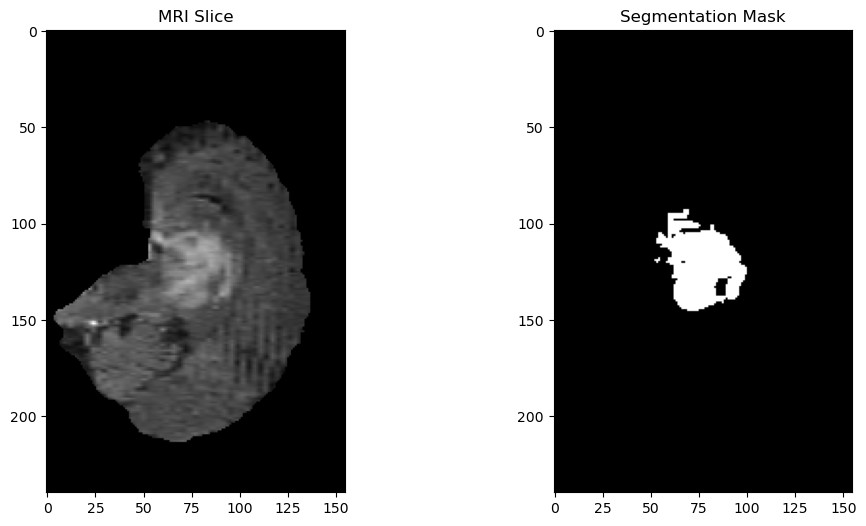

In [3]:
import matplotlib.pyplot as plt

# Function to visualize MRI slices with segmentation
def visualize_mri_with_segmentation(mri_slice, seg_slice):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice, cmap='gray')
    plt.title('MRI Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(seg_slice, cmap='gray')
    plt.title('Segmentation Mask')
    plt.show()

# Visualize the middle slice of the first subject
visualize_mri_with_segmentation(data[0][0][data[0][0].shape[0] // 2, :, :, 0], data[0][1][data[0][1].shape[0] // 2, :, :])

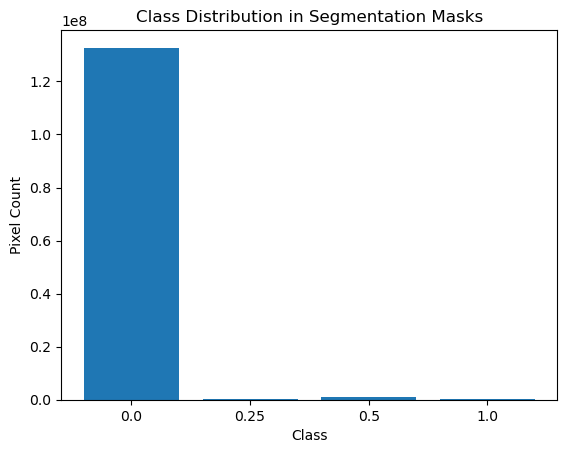

In [4]:
# Count the number of pixels for each class in the segmentation masks
class_counts = {}
for feature, seg in data:  # Assuming 'data' is structured as [(feature, seg), (feature, seg), ...]
    unique, counts = np.unique(seg, return_counts=True)
    for cls, count in zip(unique, counts):
        if cls not in class_counts:
            class_counts[cls] = 0
        class_counts[cls] += count

# Visualize the distribution
plt.bar(range(len(class_counts)), list(class_counts.values()), align='center')
plt.xticks(range(len(class_counts)), list(class_counts.keys()))
plt.title('Class Distribution in Segmentation Masks')
plt.xlabel('Class')
plt.ylabel('Pixel Count')
plt.show()

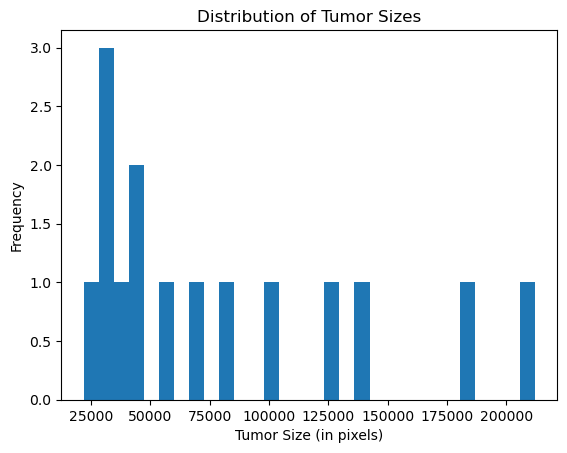

In [5]:
# Analyze the distribution of tumor sizes
tumor_sizes = []
for _, mask in data:
    tumor_size = np.sum(mask > 0)
    tumor_sizes.append(tumor_size)

plt.hist(tumor_sizes, bins=30)
plt.title('Distribution of Tumor Sizes')
plt.xlabel('Tumor Size (in pixels)')
plt.ylabel('Frequency')
plt.show()


In [1]:
import os
import numpy as np
import nibabel as nib
from sklearn.model_selection import train_test_split


# Define your base path to the dataset directory
base_path = r"C:\Users\asuto\Desktop\intern ship 2\dats\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData"

# Function to load a NIfTI file and normalize its data
def load_and_normalize_nifti(file_path):
    # Check if the file exists with either .nii or .nii.gz extension
    if os.path.exists(file_path):
        img = nib.load(file_path)
    elif os.path.exists(file_path[:-3]):
        img = nib.load(file_path[:-3])
    else:
        raise FileNotFoundError(f"No such file or no access: '{file_path}'")
    
    data = img.get_fdata()
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data.astype(np.float32)

# List to store image and mask data
image_data = []
mask_data = []

# Iterate through each subdirectory in the base directory
for subdir in sorted(os.listdir(base_path))[:10]:  # Limiting to first 10 for this example
    current_dir = os.path.join(base_path, subdir)
    if os.path.isdir(current_dir):  # Check if it's a directory
        print(f"Processing {subdir}...")
        
        # File pattern may include .nii.gz or .nii
        file_patterns = [f"{subdir}_flair.nii", f"{subdir}_t1.nii", f"{subdir}_t1ce.nii", f"{subdir}_t2.nii", f"{subdir}_seg.nii"]
        
        # Initialize a list to hold the current patient's data
        current_patient_data = []
        
        # Load and normalize the image data for each modality
        for pattern in file_patterns:
            file_path = os.path.join(current_dir, pattern)
            try:
                current_patient_data.append(load_and_normalize_nifti(file_path))
            except FileNotFoundError as e:
                print(e)
                break  # Skip this patient if any file is missing
        
        # If all modalities were successfully loaded, add them to the dataset
        if len(current_patient_data) == 5:  # We expect 5 files: 4 modalities + 1 segmentation
            # Combine modalities into a single multi-channel array and add to image data list
            image_data.append(np.stack(current_patient_data[:-1], axis=-1))
            # Add segmentation to mask data list
            mask_data.append(current_patient_data[-1])
            
            print(f"Successfully processed {subdir}")

# Convert the lists to numpy arrays for training
X_data = np.array(image_data)
y_data = np.array(mask_data).astype('float32')

# Add a channel dimension to y_data if it doesn't have one
if y_data.ndim == 4:
    y_data = np.expand_dims(y_data, axis=-1)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Now you can proceed to define and train your CNN with X_train, y_train and validate with X_val, y_val.

Processing BraTS20_Training_001...
Successfully processed BraTS20_Training_001
Processing BraTS20_Training_002...
Successfully processed BraTS20_Training_002
Processing BraTS20_Training_003...
Successfully processed BraTS20_Training_003
Processing BraTS20_Training_004...
Successfully processed BraTS20_Training_004
Processing BraTS20_Training_005...
Successfully processed BraTS20_Training_005
Processing BraTS20_Training_006...
Successfully processed BraTS20_Training_006
Processing BraTS20_Training_007...
Successfully processed BraTS20_Training_007
Processing BraTS20_Training_008...
Successfully processed BraTS20_Training_008
Processing BraTS20_Training_009...
Successfully processed BraTS20_Training_009
Processing BraTS20_Training_010...
Successfully processed BraTS20_Training_010


In [7]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess the data
def load_and_preprocess_data(base_path):
    X_data = []
    y_data = []

    for i, subdir in enumerate(sorted(os.listdir(base_path))[:10], 1):
        print(f"Processing folder {i}: {subdir}")
        folder_path = os.path.join(base_path, subdir)
        image_paths = {
            'flair': os.path.join(folder_path, f"{subdir}_flair.nii.gz"),
            't1': os.path.join(folder_path, f"{subdir}_t1.nii.gz"),
            't1ce': os.path.join(folder_path, f"{subdir}_t1ce.nii.gz"),
            't2': os.path.join(folder_path, f"{subdir}_t2.nii.gz"),
            'seg': os.path.join(folder_path, f"{subdir}_seg.nii.gz"),
        }

        try:
            images = [load_and_normalize_nifti(image_paths[modality]) for modality in ['flair', 't1', 't1ce', 't2']]
            X_data.append(np.stack(images, axis=-1))
            y_data.append(load_and_normalize_nifti(image_paths['seg']))
        except Exception as e:
            print(f"Failed to process folder {subdir}: {e}")

    return np.array(X_data), np.expand_dims(np.array(y_data), axis=-1)

def load_and_normalize_nifti(file_path):
    if not os.path.exists(file_path):
        file_path = file_path.replace('.nii.gz', '.nii')
    img = nib.load(file_path)
    data = img.get_fdata()
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data.astype('float32')

# Define U-Net model
def unet_model(input_shape=(240, 240, 4)):
    inputs = Input(input_shape)
    
    # Downsampling
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    b = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    
    # Upsampling
    u1 = UpSampling2D((2, 2))(b)
    concat1 = concatenate([u1, c2])
    c3 = Conv2D(32, (3, 3), activation='relu', padding='same')(concat1)
    u2 = UpSampling2D((2, 2))(c3)
    concat2 = concatenate([u2, c1])
    c4 = Conv2D(16, (3, 3), activation='relu', padding='same')(concat2)
    
    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c4)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Model compilation
model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Dummy data for illustration purposes
# Replace this with actual data loading and preprocessing code
X_train = np.random.rand(10, 240, 240, 4).astype(np.float32)
y_train = np.random.rand(10, 240, 240, 1).astype(np.float32)
X_val = np.random.rand(2, 240, 240, 4).astype(np.float32)
y_val = np.random.rand(2, 240, 240, 1).astype(np.float32)

# Model training
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    batch_size=2,  # Small batch size to fit in memory; adjust as necessary
    epochs=25,  # Adjust the number of epochs based on the training performance
    verbose=1
)

Epoch 1/25
5/5 [==============================] - 2s 273ms/step - loss: 0.6944 - accuracy: 0.0000e+00 - val_loss: 0.6934 - val_accuracy: 0.0000e+00
Epoch 2/25
5/5 [==============================] - 1s 203ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 3/25
5/5 [==============================] - 1s 207ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 4/25
5/5 [==============================] - 1s 205ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 5/25
5/5 [==============================] - 1s 203ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 6/25
5/5 [==============================] - 1s 198ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 7/25
5/5 [==============================] - 1s 198ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, Flatten

def cnn_rnn_model(input_shape=(None, 240, 240, 4)):
    # TimeDistributed wrapper applies a layer to every temporal slice of an input
    inputs = Input(shape=input_shape)  # The input shape should be (slices, height, width, channels)
    
    # TimeDistributed CNN layers
    td_conv1 = TimeDistributed(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))(inputs)
    td_pool1 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(td_conv1)
    td_conv2 = TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))(td_pool1)
    td_pool2 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(td_conv2)
    
    # Flatten the features from each time step
    td_flat = TimeDistributed(Flatten())(td_pool2)
    
    # LSTM layers can be added to process sequence of features
    lstm1 = LSTM(256, return_sequences=False)(td_flat)
    
    # Output layer
    outputs = Dense(1, activation='sigmoid')(lstm1)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Dummy sequential data for illustration purposes
# Each sequence consists of 10 slices, and each slice is 240x240 in size with 4 channels (modalities)
X_train_seq = np.random.rand(5, 10, 240, 240, 4).astype(np.float32)  # Batch size of 5
y_train_seq = np.random.rand(5, 1).astype(np.float32)  # Corresponding labels for each sequence

# Define and compile the model
model = cnn_rnn_model()

# Train the model on sequential data
history = model.fit(
    X_train_seq, y_train_seq,
    batch_size=2,  # Adjust as necessary
    epochs=25,     # Adjust the number of epochs as needed
    verbose=1
)

# Print the training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {train_accuracy}")

Epoch 1/25
